## Real Data Time Series (EEG dataset)



This Notebook generates data for the eeg dataset 

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from utils import extract_time
from utils import random_generator
from utils import MinMaxScaler
from utils import sine_data_generation
from utils import visualization

from modules_and_training import TimeGAN
from modules_and_training import Time_GAN_module

# Helper Functions

In [3]:
def real_data_loading (data_name, seq_len):
  """Load and preprocess real-world datasets.
  
  Args:
    - data_name: stock or energy
    - seq_len: sequence length
    
  Returns:
    - data: preprocessed data.
  """  
  assert data_name in ['stock','energy', 'eeg']
  
  if data_name == "eeg":
    ori_data = pd.read_csv("C:/Users/wuxiaolong/tmp/eeg.csv") #file too large for github. see preprocess_eeg_data.R
  else:
    if data_name == 'stock':
      ori_data = np.loadtxt('data/stock_data.csv', delimiter = ",",skiprows = 1)
    elif data_name == 'energy':
      ori_data = np.loadtxt('data/energy_data.csv', delimiter = ",",skiprows = 1)
        
  # Flip the data to make chronological data
  ori_data = ori_data[::-1]
  # Normalize the data
  if data_name != "eeg":
    ori_data = MinMaxScaler(ori_data)
    
  # Preprocess the dataset
  temp_data = []    
  # Cut data by sequence length
  if data_name != "eeg":
    MAX_ROWS = len(ori_data) - seq_len
  else:
    MAX_ROWS = seq_len*5000

  for i in range(0, min(len(ori_data) - seq_len, MAX_ROWS)):
    _x = ori_data[i:i + seq_len]
    temp_data.append(_x)
        
  # Mix the datasets (to make it similar to i.i.d)
  idx = np.random.permutation(len(temp_data))    
  data = []
  for i in range(len(temp_data)):
    if (data_name != "eeg"):
       data.append(temp_data[idx[i]])
    else:
       if (temp_data[idx[i]]).isna().sum().sum() == 0: #no NAs
          data.append(temp_data[idx[i]].to_numpy())   
    
  return data



Parameters

In [4]:
parameters = dict()
parameters['module'] = 'gru' 
parameters['hidden_dim'] = 40
parameters['num_layers'] = 1
parameters['iterations'] = 100
parameters['epoch'] = 4 

data_name = "eeg"

if data_name == "eeg":
  seq_len, dim = 24, 7
  data = real_data_loading(data_name, seq_len)
  data = torch.Tensor(data) 

if data_name == "sine":
  no = 306000
  seq_len, dim = 24, 1
  data = sine_data_generation(no, seq_len, dim)

In [5]:
data = data[0:102000]#restrict number of samples for illustration purposes
#should not be too small though, as timegan needs relatively large numbers of training data, see below

no = len(data)#number of examples 
parameters['batch_size'] = 1020

In [6]:
data.shape

torch.Size([102000, 24, 7])

Start Embedding Network Training
step: 1/4, e_loss: 16.448584
step: 2/4, e_loss: 16.44552
step: 3/4, e_loss: 16.44415
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 1/4, s_loss: 0.06404543
step: 2/4, s_loss: 0.033491407
step: 3/4, s_loss: 0.024867153
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/4, D_loss: 4.030523, G_loss_U: 0.2225655, G_loss_S: 0.0004125991, E_loss_t0: 16.543886


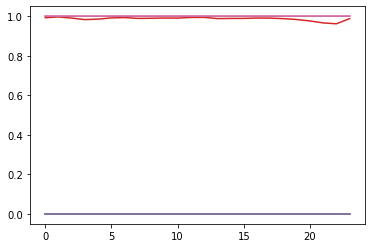

step: 0/4, D_loss: 3.3879848, G_loss_U: 0.3422694, G_loss_S: 0.0005351146, E_loss_t0: 16.53616


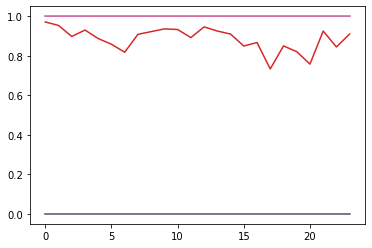

step: 0/4, D_loss: 2.6806598, G_loss_U: 0.5055797, G_loss_S: 0.0013079937, E_loss_t0: 16.579687


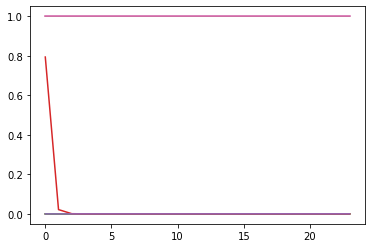

step: 0/4, D_loss: 2.2062244, G_loss_U: 0.68763363, G_loss_S: 0.0034218237, E_loss_t0: 16.770542


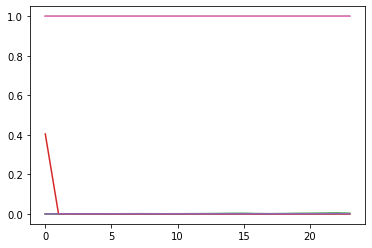

step: 0/4, D_loss: 1.964602, G_loss_U: 0.8632594, G_loss_S: 0.0070029483, E_loss_t0: 16.382734


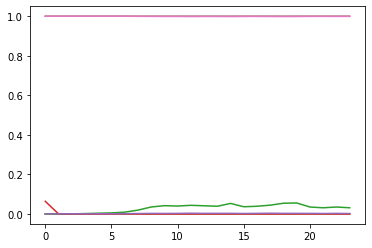

step: 0/4, D_loss: 1.8651557, G_loss_U: 1.0132626, G_loss_S: 0.012110391, E_loss_t0: 16.57443


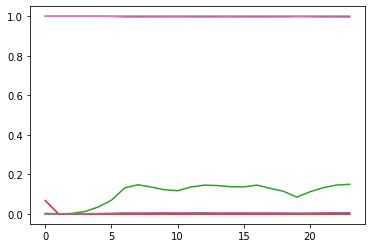

step: 0/4, D_loss: 1.8274817, G_loss_U: 1.1267884, G_loss_S: 0.017923208, E_loss_t0: 16.549679


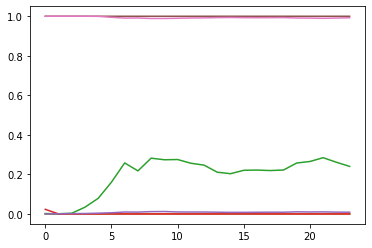

step: 0/4, D_loss: 1.7992831, G_loss_U: 1.2002244, G_loss_S: 0.024745585, E_loss_t0: 16.598791


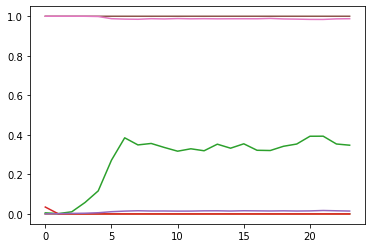

step: 0/4, D_loss: 1.7563742, G_loss_U: 1.2351319, G_loss_S: 0.03214318, E_loss_t0: 16.520369


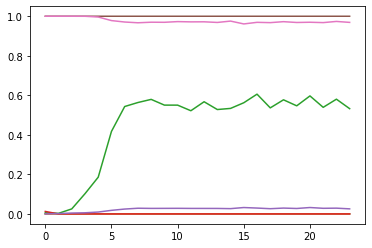

step: 0/4, D_loss: 1.6922059, G_loss_U: 1.2363659, G_loss_S: 0.040110387, E_loss_t0: 16.573606


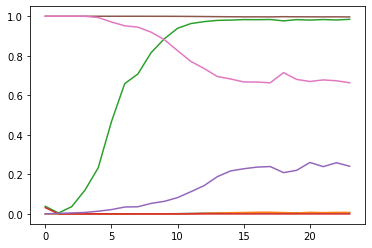

step: 0/4, D_loss: 1.6069459, G_loss_U: 1.2114704, G_loss_S: 0.04914266, E_loss_t0: 16.499722


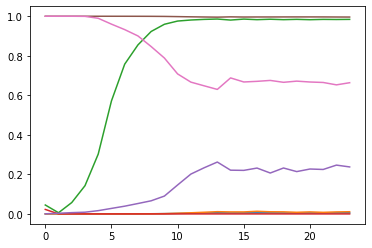

step: 0/4, D_loss: 1.5056632, G_loss_U: 1.1709771, G_loss_S: 0.05903496, E_loss_t0: 16.44364


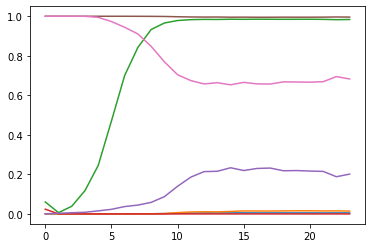

step: 0/4, D_loss: 1.3944776, G_loss_U: 1.128613, G_loss_S: 0.06930113, E_loss_t0: 16.458057


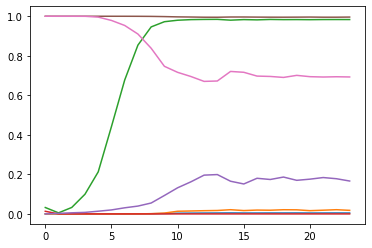

step: 0/4, D_loss: 1.2760812, G_loss_U: 1.1030791, G_loss_S: 0.07936846, E_loss_t0: 16.672598


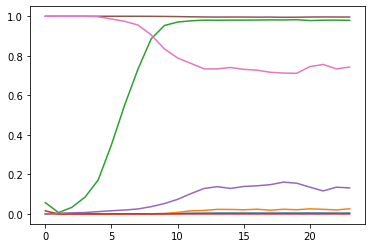

step: 0/4, D_loss: 1.1525925, G_loss_U: 1.127263, G_loss_S: 0.08815787, E_loss_t0: 16.421913


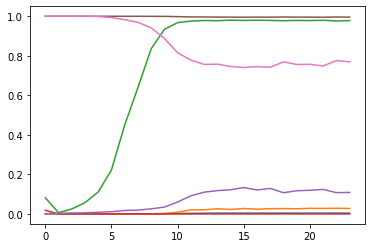

step: 0/4, D_loss: 1.0147343, G_loss_U: 1.2663335, G_loss_S: 0.09560234, E_loss_t0: 16.562147


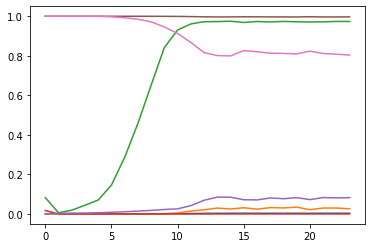

step: 0/4, D_loss: 0.8461948, G_loss_U: 1.5617988, G_loss_S: 0.10225016, E_loss_t0: 16.535894


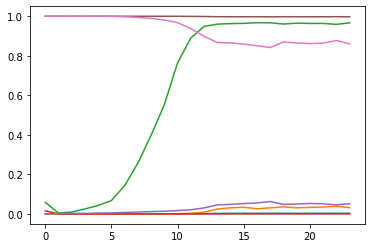

step: 0/4, D_loss: 0.6644977, G_loss_U: 1.9037144, G_loss_S: 0.10655148, E_loss_t0: 16.745646


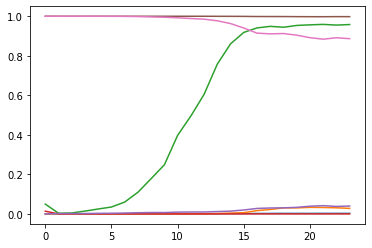

step: 0/4, D_loss: 0.5151284, G_loss_U: 2.228819, G_loss_S: 0.109982155, E_loss_t0: 16.477812


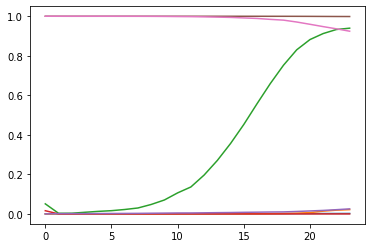

step: 0/4, D_loss: 0.40110397, G_loss_U: 2.5358226, G_loss_S: 0.11192769, E_loss_t0: 16.450422


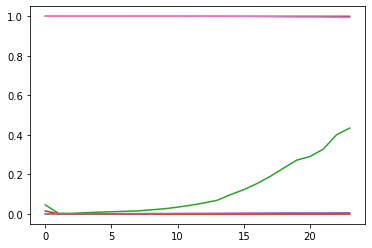

step: 0/4, D_loss: 0.31331933, G_loss_U: 2.8264675, G_loss_S: 0.11251581, E_loss_t0: 16.58232


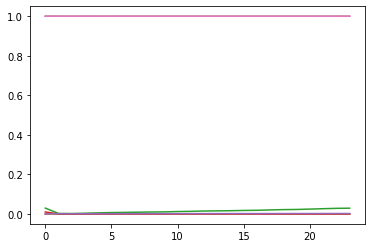

step: 0/4, D_loss: 0.24444063, G_loss_U: 3.0969641, G_loss_S: 0.11261623, E_loss_t0: 16.475414


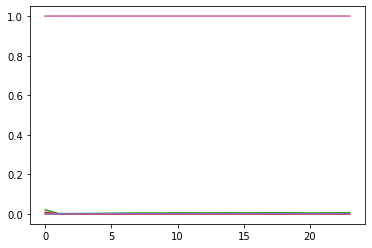

step: 0/4, D_loss: 0.19268107, G_loss_U: 3.3444335, G_loss_S: 0.11148196, E_loss_t0: 16.672873


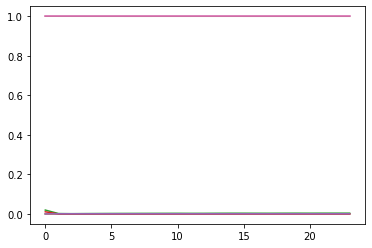

step: 0/4, D_loss: 0.15438078, G_loss_U: 3.5744197, G_loss_S: 0.10969812, E_loss_t0: 16.417253


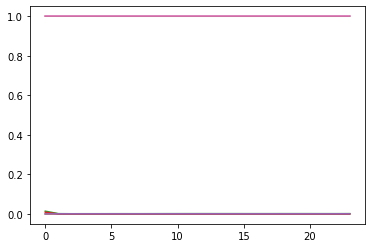

step: 0/4, D_loss: 0.1257039, G_loss_U: 3.5721447, G_loss_S: 0.10763743, E_loss_t0: 16.507591


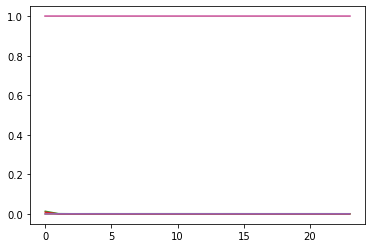

step: 0/4, D_loss: 0.12627517, G_loss_U: 3.569649, G_loss_S: 0.10476917, E_loss_t0: 16.48335


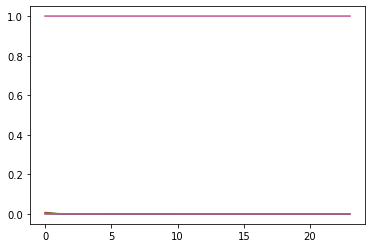

step: 0/4, D_loss: 0.12663415, G_loss_U: 3.5670106, G_loss_S: 0.10217922, E_loss_t0: 16.736586


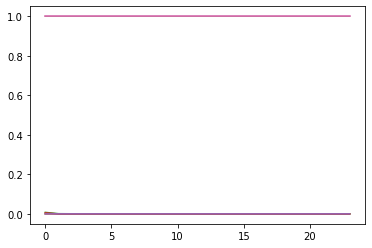

step: 0/4, D_loss: 0.12797606, G_loss_U: 3.5643265, G_loss_S: 0.0997603, E_loss_t0: 16.858725


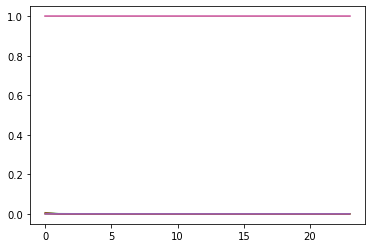

step: 0/4, D_loss: 0.12868917, G_loss_U: 3.5616872, G_loss_S: 0.0977797, E_loss_t0: 16.448673


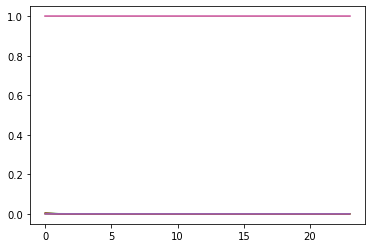

step: 0/4, D_loss: 0.1303623, G_loss_U: 3.5591586, G_loss_S: 0.09639584, E_loss_t0: 16.764378


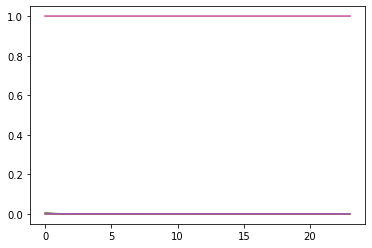

step: 0/4, D_loss: 0.13233587, G_loss_U: 3.5567737, G_loss_S: 0.095259264, E_loss_t0: 16.565332


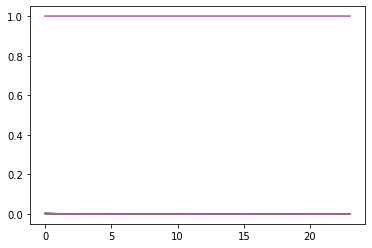

step: 0/4, D_loss: 0.13396615, G_loss_U: 3.5545313, G_loss_S: 0.09438561, E_loss_t0: 16.650911


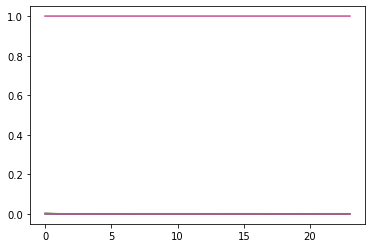

step: 0/4, D_loss: 0.13555898, G_loss_U: 3.552407, G_loss_S: 0.09377038, E_loss_t0: 16.524666


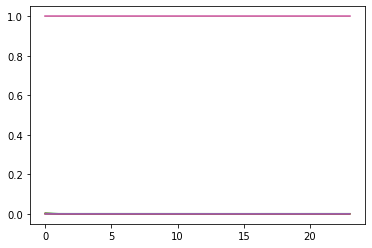

step: 0/4, D_loss: 0.13722266, G_loss_U: 3.5503616, G_loss_S: 0.09320285, E_loss_t0: 16.471746


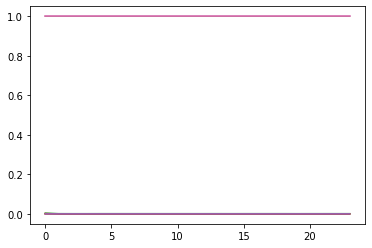

step: 0/4, D_loss: 0.13822374, G_loss_U: 3.548355, G_loss_S: 0.092354886, E_loss_t0: 16.527391


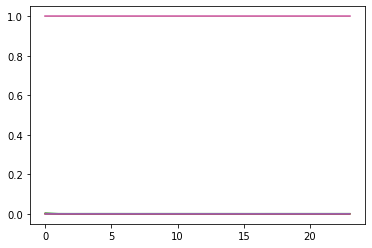

step: 0/4, D_loss: 0.13974525, G_loss_U: 3.5463517, G_loss_S: 0.09151582, E_loss_t0: 16.712044


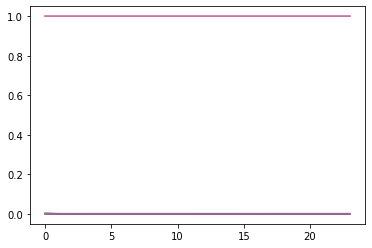

step: 0/4, D_loss: 0.14129469, G_loss_U: 3.5443263, G_loss_S: 0.0905034, E_loss_t0: 16.753885


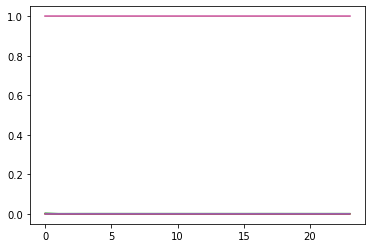

step: 0/4, D_loss: 0.1424971, G_loss_U: 3.5422704, G_loss_S: 0.08905277, E_loss_t0: 16.516739


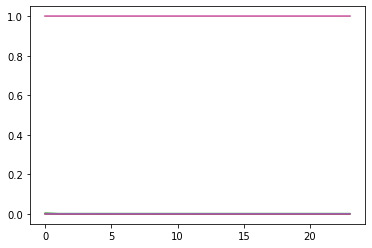

step: 0/4, D_loss: 0.14338268, G_loss_U: 3.540189, G_loss_S: 0.08729628, E_loss_t0: 16.544254


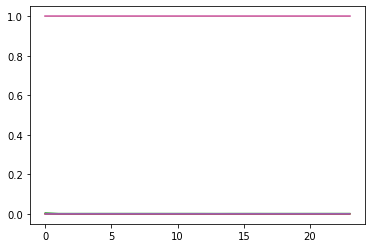

step: 0/4, D_loss: 0.14472243, G_loss_U: 3.5381036, G_loss_S: 0.085415326, E_loss_t0: 16.507845


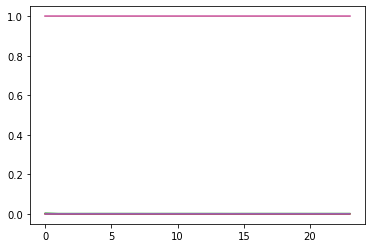

step: 0/4, D_loss: 0.14563018, G_loss_U: 3.5360467, G_loss_S: 0.08367287, E_loss_t0: 16.520151


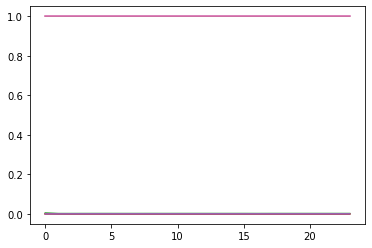

step: 0/4, D_loss: 0.14678687, G_loss_U: 3.5340621, G_loss_S: 0.08193183, E_loss_t0: 16.72479


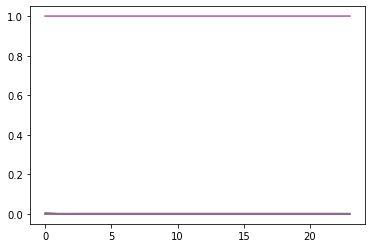

step: 0/4, D_loss: 0.14782298, G_loss_U: 3.5321965, G_loss_S: 0.08047526, E_loss_t0: 16.629791


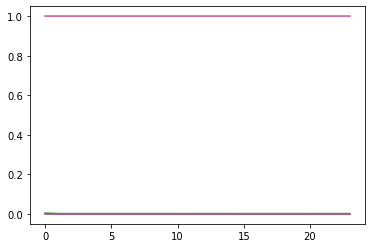

step: 0/4, D_loss: 0.14888312, G_loss_U: 3.5304923, G_loss_S: 0.07915571, E_loss_t0: 16.58137


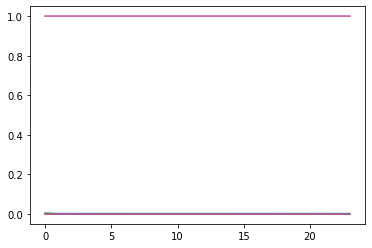

step: 0/4, D_loss: 0.15053299, G_loss_U: 3.7485633, G_loss_S: 0.078060634, E_loss_t0: 16.554594


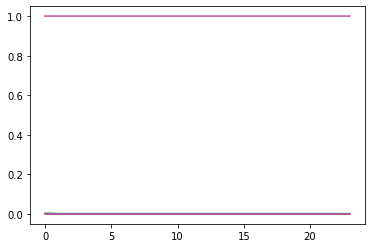

step: 0/4, D_loss: 0.12277056, G_loss_U: 3.7472873, G_loss_S: 0.077259734, E_loss_t0: 16.547058


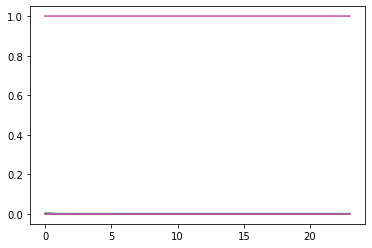

step: 0/4, D_loss: 0.12360698, G_loss_U: 3.7462096, G_loss_S: 0.076630645, E_loss_t0: 16.510746


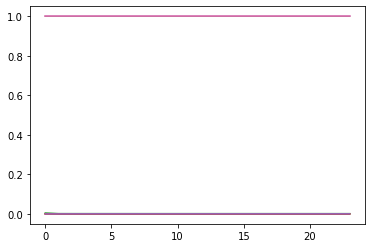

step: 0/4, D_loss: 0.1240358, G_loss_U: 3.7453125, G_loss_S: 0.07614613, E_loss_t0: 16.629635


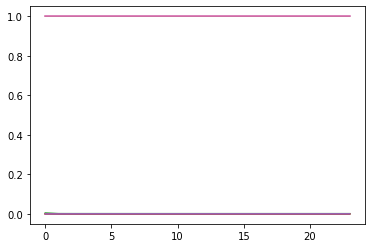

step: 0/4, D_loss: 0.12432583, G_loss_U: 3.7445705, G_loss_S: 0.07579143, E_loss_t0: 16.503424


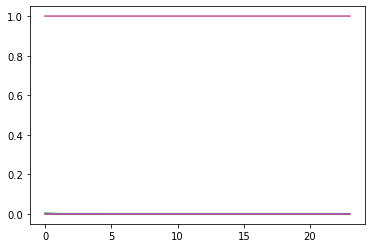

step: 0/4, D_loss: 0.125506, G_loss_U: 3.743956, G_loss_S: 0.07521436, E_loss_t0: 16.460005


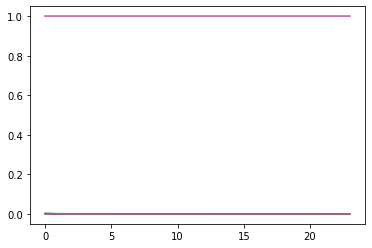

step: 0/4, D_loss: 0.12682089, G_loss_U: 3.743444, G_loss_S: 0.07463284, E_loss_t0: 16.63453


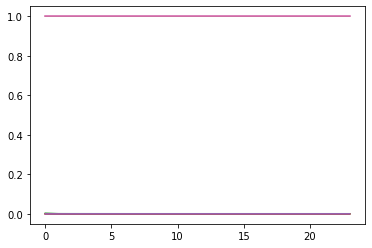

step: 0/4, D_loss: 0.12718955, G_loss_U: 3.743012, G_loss_S: 0.07411726, E_loss_t0: 16.73006


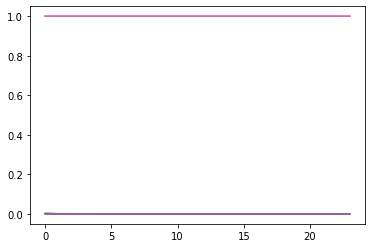

step: 0/4, D_loss: 0.12822287, G_loss_U: 3.7426417, G_loss_S: 0.07327062, E_loss_t0: 16.405643


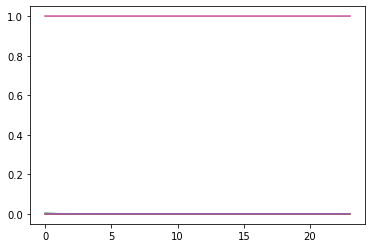

step: 0/4, D_loss: 0.13193242, G_loss_U: 3.74232, G_loss_S: 0.072383694, E_loss_t0: 16.561272


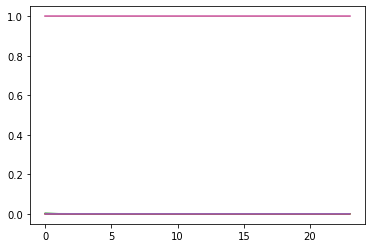

step: 0/4, D_loss: 0.13300012, G_loss_U: 3.7420356, G_loss_S: 0.07148557, E_loss_t0: 16.60765


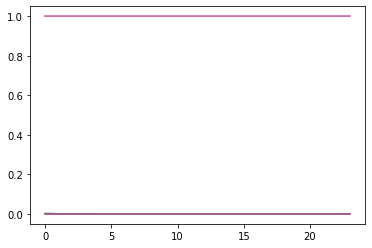

step: 0/4, D_loss: 0.13457231, G_loss_U: 3.7417815, G_loss_S: 0.07072498, E_loss_t0: 16.628305


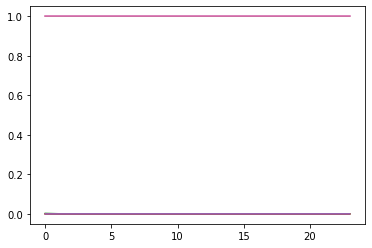

step: 0/4, D_loss: 0.1370364, G_loss_U: 3.74155, G_loss_S: 0.06955195, E_loss_t0: 16.435234


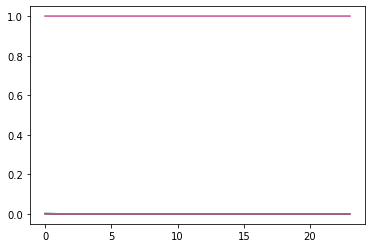

step: 0/4, D_loss: 0.14995164, G_loss_U: 3.7413375, G_loss_S: 0.068826824, E_loss_t0: 16.543587


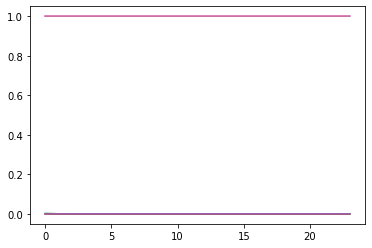

step: 0/4, D_loss: 0.14892906, G_loss_U: 3.7411404, G_loss_S: 0.0677341, E_loss_t0: 16.546274


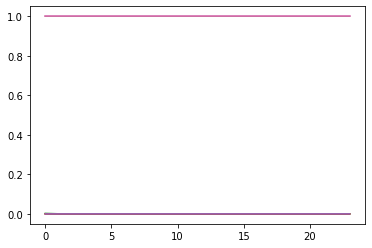

step: 0/4, D_loss: 0.18494603, G_loss_U: 3.9284472, G_loss_S: 0.066756725, E_loss_t0: 16.448324


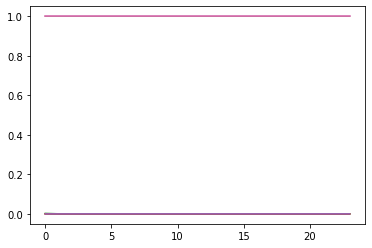

step: 0/4, D_loss: 0.11611636, G_loss_U: 3.9282753, G_loss_S: 0.067245856, E_loss_t0: 16.67319


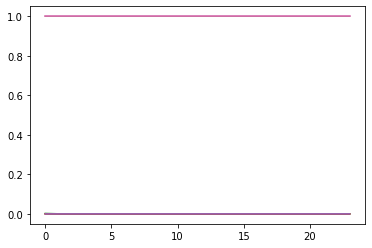

step: 0/4, D_loss: 0.11132426, G_loss_U: 3.9281123, G_loss_S: 0.0679122, E_loss_t0: 16.361979


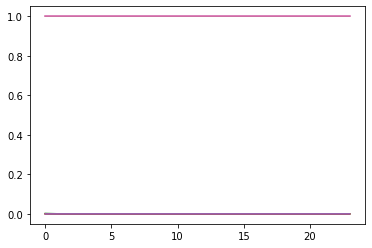

step: 0/4, D_loss: 0.11037728, G_loss_U: 3.9279566, G_loss_S: 0.06816321, E_loss_t0: 16.455505


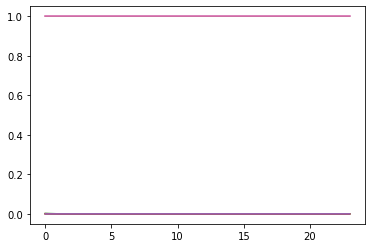

step: 0/4, D_loss: 0.10798582, G_loss_U: 3.9278066, G_loss_S: 0.068406194, E_loss_t0: 16.347424


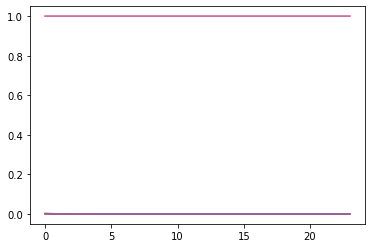

step: 0/4, D_loss: 0.10738805, G_loss_U: 3.927662, G_loss_S: 0.06849265, E_loss_t0: 16.570847


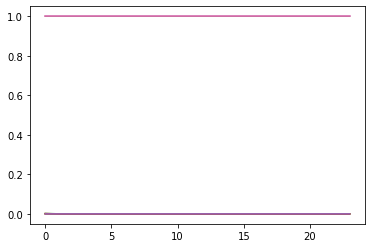

step: 0/4, D_loss: 0.10726552, G_loss_U: 3.9275205, G_loss_S: 0.068688124, E_loss_t0: 16.44222


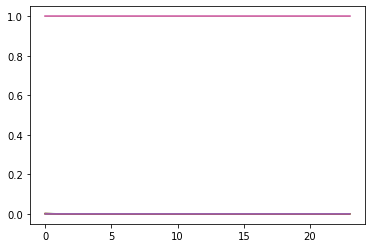

step: 0/4, D_loss: 0.108355366, G_loss_U: 3.9273815, G_loss_S: 0.068521135, E_loss_t0: 16.511509


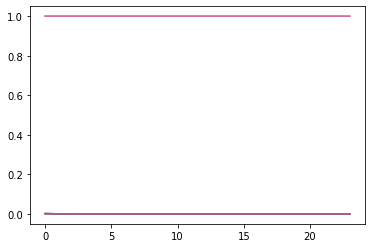

step: 0/4, D_loss: 0.11086299, G_loss_U: 3.927245, G_loss_S: 0.068099625, E_loss_t0: 16.43742


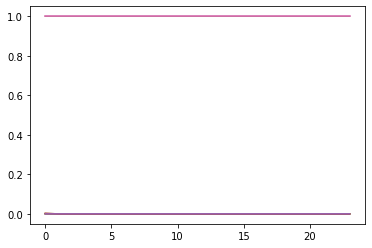

step: 0/4, D_loss: 0.113799065, G_loss_U: 3.9271066, G_loss_S: 0.06767454, E_loss_t0: 16.62305


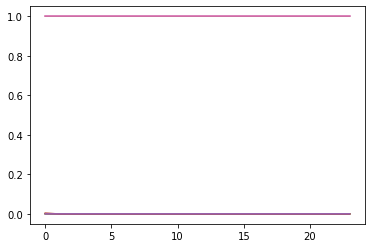

step: 0/4, D_loss: 0.12608321, G_loss_U: 3.926966, G_loss_S: 0.06696234, E_loss_t0: 16.489912


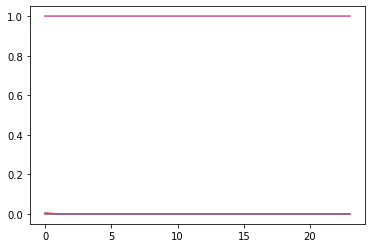

step: 0/4, D_loss: 0.1337375, G_loss_U: 3.9268203, G_loss_S: 0.06634199, E_loss_t0: 16.424976


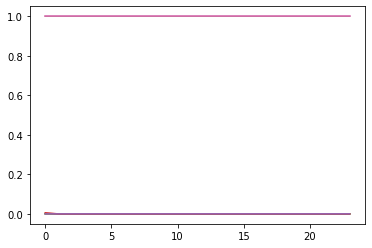

step: 0/4, D_loss: 0.14840153, G_loss_U: 3.9266663, G_loss_S: 0.06545049, E_loss_t0: 16.590988


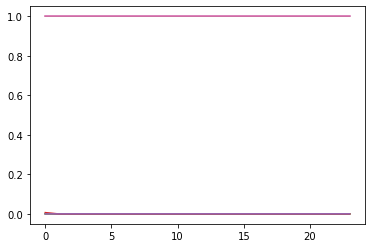

step: 0/4, D_loss: 0.17104724, G_loss_U: 4.0792966, G_loss_S: 0.064251654, E_loss_t0: 16.656197


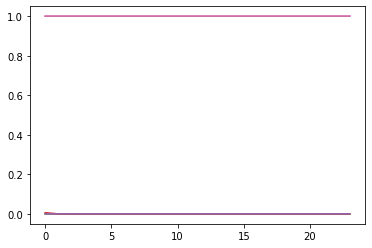

step: 0/4, D_loss: 0.09911961, G_loss_U: 4.079109, G_loss_S: 0.064794526, E_loss_t0: 16.584381


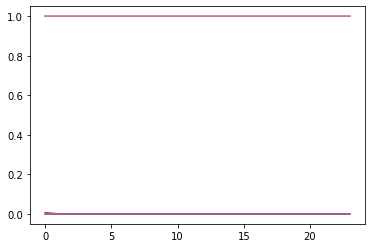

step: 0/4, D_loss: 0.091664754, G_loss_U: 4.0788956, G_loss_S: 0.06513982, E_loss_t0: 16.490799


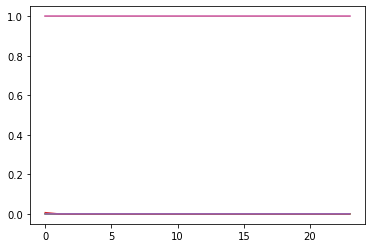

step: 0/4, D_loss: 0.093519256, G_loss_U: 4.0786495, G_loss_S: 0.064796135, E_loss_t0: 16.604013


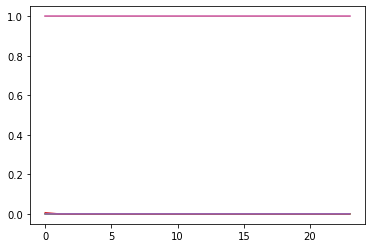

step: 0/4, D_loss: 0.091225445, G_loss_U: 4.078364, G_loss_S: 0.06470935, E_loss_t0: 16.538645


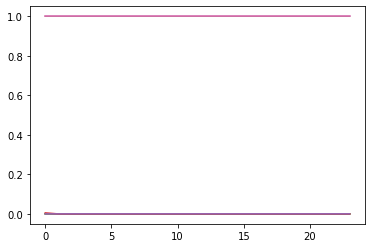

step: 0/4, D_loss: 0.09113189, G_loss_U: 4.078028, G_loss_S: 0.06423052, E_loss_t0: 16.507221


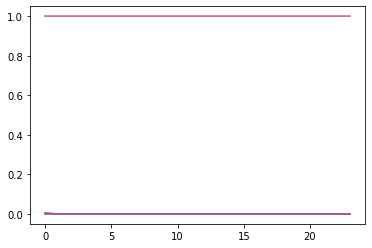

step: 0/4, D_loss: 0.09119808, G_loss_U: 4.0776362, G_loss_S: 0.06381105, E_loss_t0: 16.542036


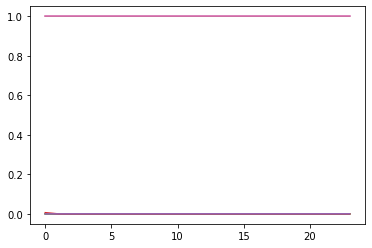

step: 0/4, D_loss: 0.091831446, G_loss_U: 4.077182, G_loss_S: 0.06296435, E_loss_t0: 16.530334


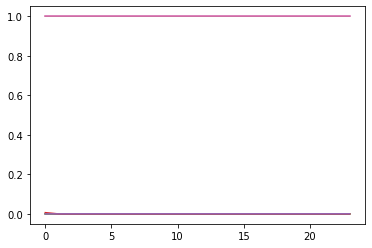

step: 0/4, D_loss: 0.09325432, G_loss_U: 4.076666, G_loss_S: 0.06225803, E_loss_t0: 16.558846


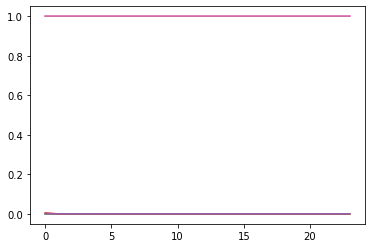

step: 0/4, D_loss: 0.09391515, G_loss_U: 4.076088, G_loss_S: 0.06109445, E_loss_t0: 16.58406


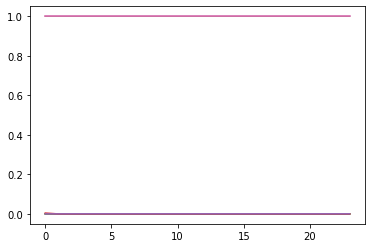

step: 0/4, D_loss: 0.09528132, G_loss_U: 4.07545, G_loss_S: 0.06000852, E_loss_t0: 16.553946


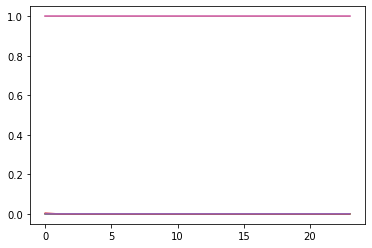

step: 0/4, D_loss: 0.0978327, G_loss_U: 4.074749, G_loss_S: 0.05862707, E_loss_t0: 16.640596


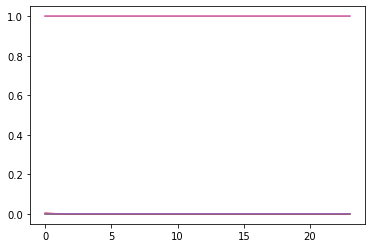

step: 0/4, D_loss: 0.11437313, G_loss_U: 4.073977, G_loss_S: 0.057064403, E_loss_t0: 16.717943


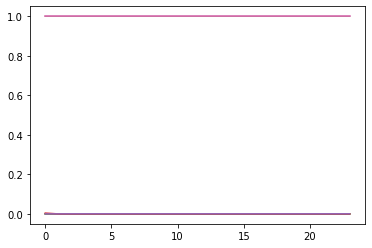

step: 0/4, D_loss: 0.106145404, G_loss_U: 4.0731287, G_loss_S: 0.05581624, E_loss_t0: 16.739264


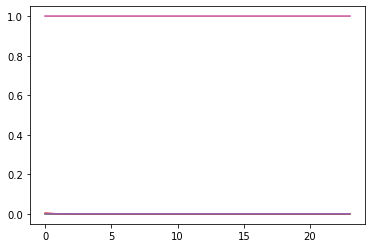

step: 0/4, D_loss: 0.1367121, G_loss_U: 4.0722156, G_loss_S: 0.054213546, E_loss_t0: 16.463652


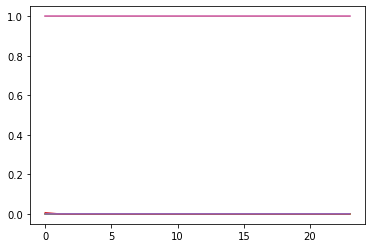

step: 0/4, D_loss: 0.16022202, G_loss_U: 4.172775, G_loss_S: 0.052823514, E_loss_t0: 16.609165


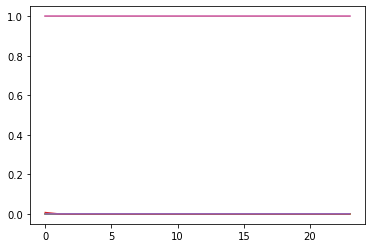

step: 0/4, D_loss: 0.08687884, G_loss_U: 4.1717997, G_loss_S: 0.053446032, E_loss_t0: 16.596672


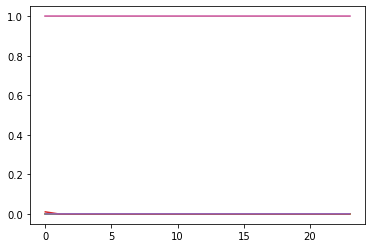

step: 0/4, D_loss: 0.09196704, G_loss_U: 4.170935, G_loss_S: 0.05452298, E_loss_t0: 16.555445


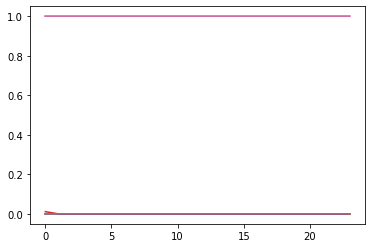

step: 0/4, D_loss: 0.08991381, G_loss_U: 4.1702285, G_loss_S: 0.05524822, E_loss_t0: 16.51868


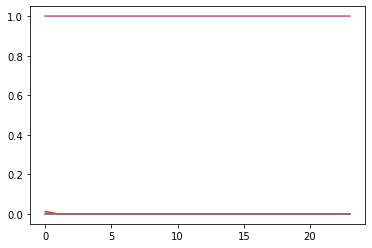

step: 0/4, D_loss: 0.08774449, G_loss_U: 4.169682, G_loss_S: 0.05561503, E_loss_t0: 16.68931


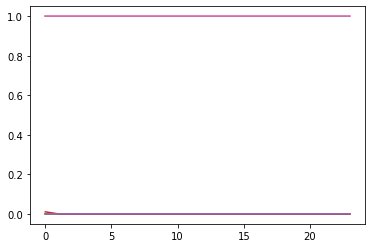

step: 0/4, D_loss: 0.08709785, G_loss_U: 4.1692667, G_loss_S: 0.05588054, E_loss_t0: 16.679998


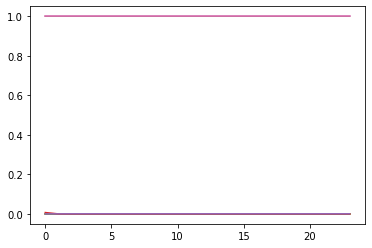

step: 0/4, D_loss: 0.11062836, G_loss_U: 4.168942, G_loss_S: 0.055544425, E_loss_t0: 16.720499


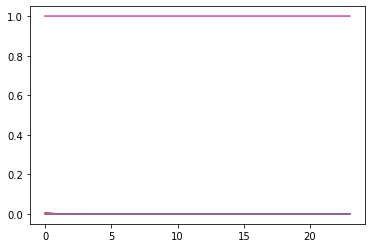

step: 0/4, D_loss: 0.09747964, G_loss_U: 4.168674, G_loss_S: 0.055288147, E_loss_t0: 16.740702


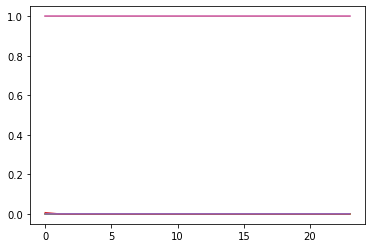

step: 0/4, D_loss: 0.101800516, G_loss_U: 4.1684327, G_loss_S: 0.05495639, E_loss_t0: 16.404125


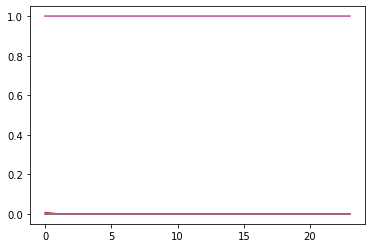

step: 0/4, D_loss: 0.14354785, G_loss_U: 4.168197, G_loss_S: 0.054513823, E_loss_t0: 16.610184


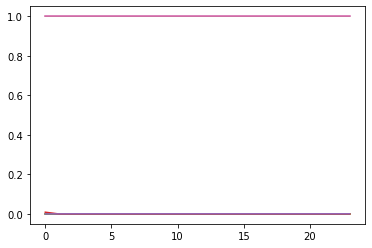

step: 0/4, D_loss: 0.1653867, G_loss_U: 4.220405, G_loss_S: 0.053005118, E_loss_t0: 16.57165


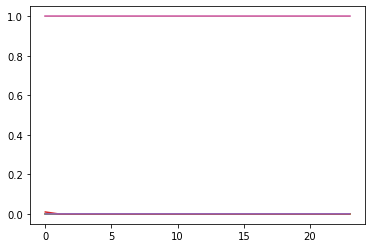

step: 0/4, D_loss: 0.089912266, G_loss_U: 4.2200704, G_loss_S: 0.05448122, E_loss_t0: 16.675928


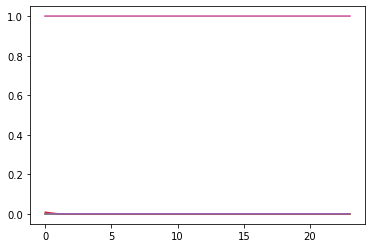

step: 0/4, D_loss: 0.07897602, G_loss_U: 4.2196517, G_loss_S: 0.05464806, E_loss_t0: 16.643358


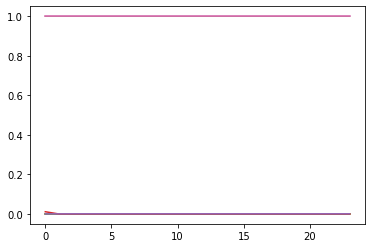

step: 1/4, D_loss: 3.165153, G_loss_U: 0.09482848, G_loss_S: 0.05499473, E_loss_t0: 16.543324


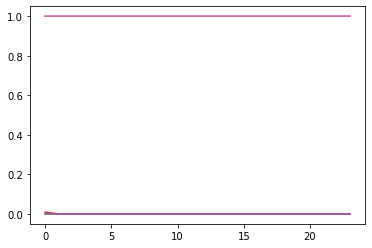

step: 1/4, D_loss: 3.0444257, G_loss_U: 2.746036, G_loss_S: 0.055032507, E_loss_t0: 16.536161


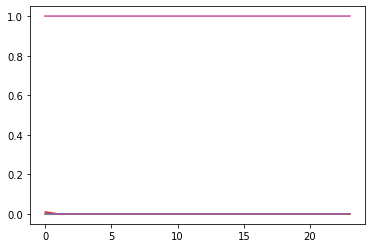

step: 1/4, D_loss: 0.17820467, G_loss_U: 2.848364, G_loss_S: 0.054447405, E_loss_t0: 16.57994


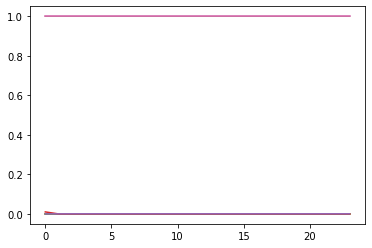

step: 1/4, D_loss: 0.14607795, G_loss_U: 2.8472235, G_loss_S: 0.05419311, E_loss_t0: 16.770475


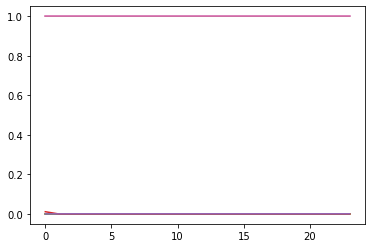

step: 1/4, D_loss: 0.14700697, G_loss_U: 2.8452506, G_loss_S: 0.053492192, E_loss_t0: 16.382652


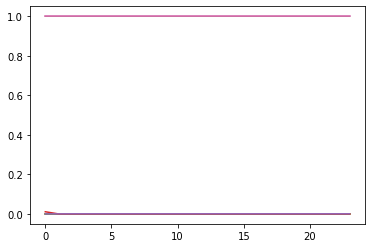

step: 1/4, D_loss: 0.14802481, G_loss_U: 2.842585, G_loss_S: 0.05264549, E_loss_t0: 16.574333


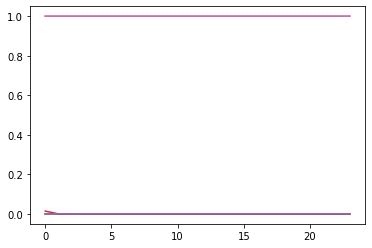

step: 1/4, D_loss: 0.14933315, G_loss_U: 2.8395877, G_loss_S: 0.051875677, E_loss_t0: 16.549559


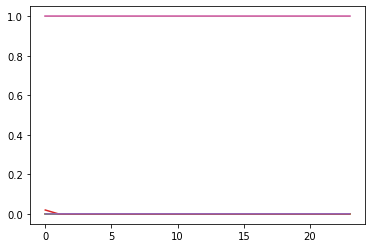

step: 1/4, D_loss: 0.15078245, G_loss_U: 2.8559418, G_loss_S: 0.050715584, E_loss_t0: 16.5987


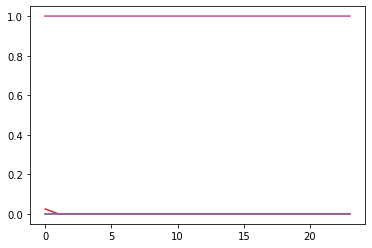

step: 1/4, D_loss: 0.14870635, G_loss_U: 2.8542264, G_loss_S: 0.050138693, E_loss_t0: 16.520247


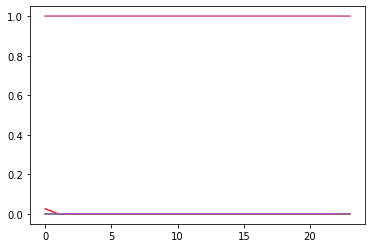

step: 1/4, D_loss: 0.15030758, G_loss_U: 2.867002, G_loss_S: 0.048838466, E_loss_t0: 16.573473


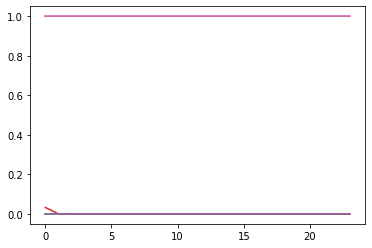

step: 1/4, D_loss: 0.15468869, G_loss_U: 2.885266, G_loss_S: 0.04814934, E_loss_t0: 16.49962


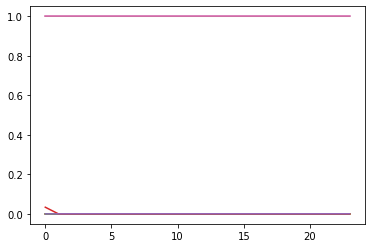

step: 1/4, D_loss: 0.16640112, G_loss_U: 2.9091666, G_loss_S: 0.047519106, E_loss_t0: 16.443525


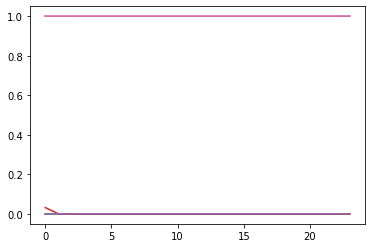

step: 1/4, D_loss: 0.1792027, G_loss_U: 2.9374752, G_loss_S: 0.046903875, E_loss_t0: 16.45792


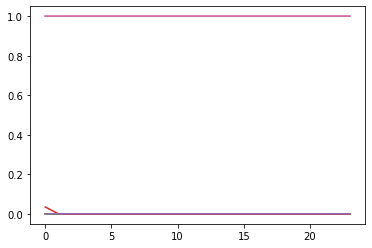

step: 1/4, D_loss: 0.20490868, G_loss_U: 2.9581838, G_loss_S: 0.04695396, E_loss_t0: 16.672474


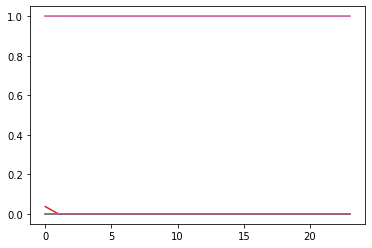

step: 1/4, D_loss: 0.18874978, G_loss_U: 2.981892, G_loss_S: 0.048499197, E_loss_t0: 16.421785


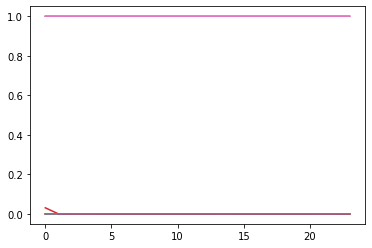

step: 1/4, D_loss: 0.17717372, G_loss_U: 3.0123155, G_loss_S: 0.051035687, E_loss_t0: 16.562016


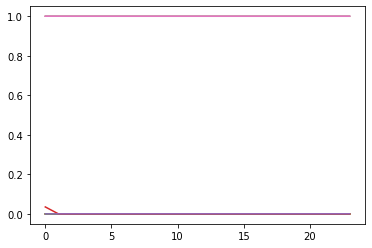

step: 1/4, D_loss: 0.1665808, G_loss_U: 3.049669, G_loss_S: 0.054238122, E_loss_t0: 16.535774


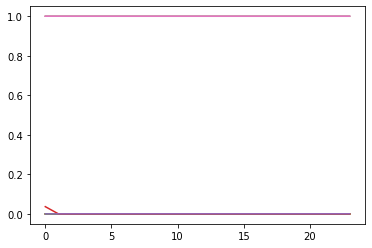

step: 1/4, D_loss: 0.15880814, G_loss_U: 3.0931356, G_loss_S: 0.057443496, E_loss_t0: 16.745522


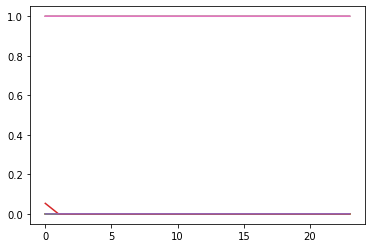

step: 1/4, D_loss: 0.1514233, G_loss_U: 3.1417592, G_loss_S: 0.060618374, E_loss_t0: 16.477682


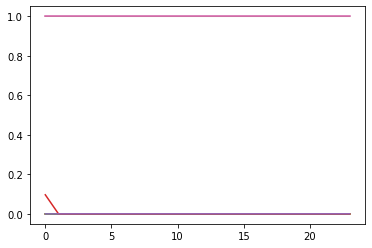

step: 1/4, D_loss: 0.1430084, G_loss_U: 3.141654, G_loss_S: 0.063905194, E_loss_t0: 16.450302


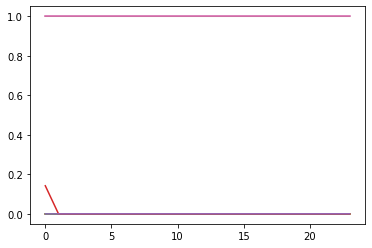

step: 1/4, D_loss: 0.14081033, G_loss_U: 3.1415684, G_loss_S: 0.06618242, E_loss_t0: 16.582184


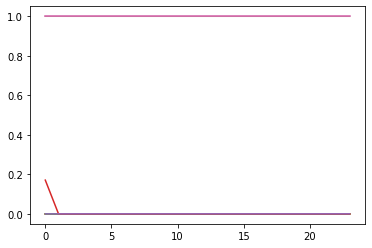

step: 1/4, D_loss: 0.13904104, G_loss_U: 3.1414976, G_loss_S: 0.067956485, E_loss_t0: 16.475256


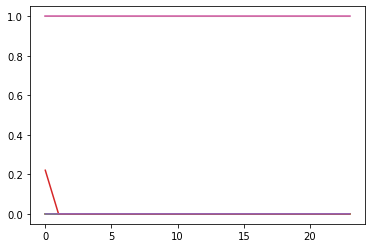

step: 1/4, D_loss: 0.13772832, G_loss_U: 3.1414359, G_loss_S: 0.0689552, E_loss_t0: 16.672722


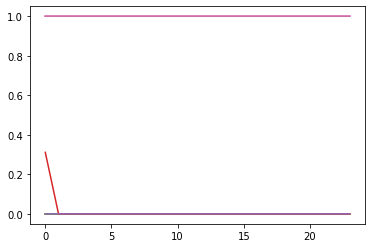

step: 1/4, D_loss: 0.13779277, G_loss_U: 3.141377, G_loss_S: 0.06977647, E_loss_t0: 16.41708


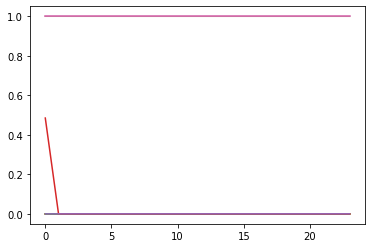

step: 1/4, D_loss: 0.13782234, G_loss_U: 3.1413178, G_loss_S: 0.06993439, E_loss_t0: 16.507397


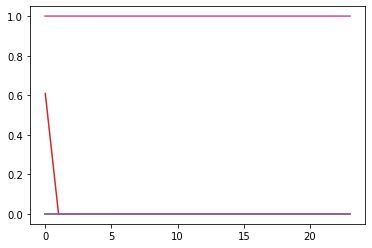

step: 1/4, D_loss: 0.13927217, G_loss_U: 3.1412544, G_loss_S: 0.06891771, E_loss_t0: 16.483099


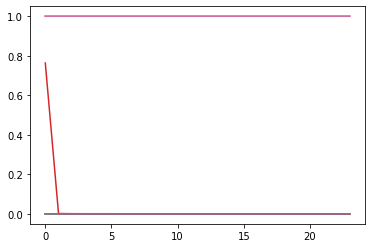

step: 1/4, D_loss: 0.13972726, G_loss_U: 3.1411839, G_loss_S: 0.06793014, E_loss_t0: 16.7362


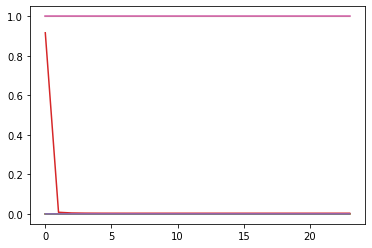

step: 1/4, D_loss: 0.14275675, G_loss_U: 3.141104, G_loss_S: 0.06655451, E_loss_t0: 16.857616


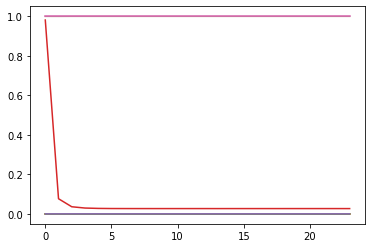

step: 1/4, D_loss: 0.14344391, G_loss_U: 3.1410136, G_loss_S: 0.06592523, E_loss_t0: 16.446676


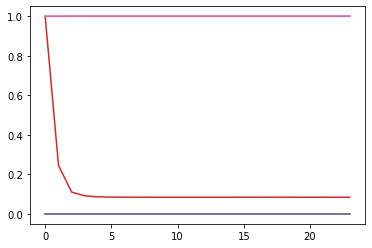

step: 1/4, D_loss: 0.14843619, G_loss_U: 3.1409123, G_loss_S: 0.06479886, E_loss_t0: 16.762465


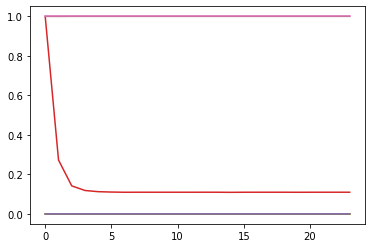

step: 1/4, D_loss: 0.1511771, G_loss_U: 3.1929214, G_loss_S: 0.0630247, E_loss_t0: 16.56288


KeyboardInterrupt: 

In [7]:
Generator, Embedder, Supervisor, Recovery, Discriminator, checkpoints = TimeGAN(data, parameters)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.023s...
[t-SNE] Computed neighbors for 2000 samples in 0.337s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.001069
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.139946
[t-SNE] KL divergence after 300 iterations: 1.699220


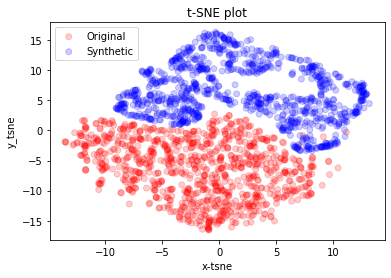

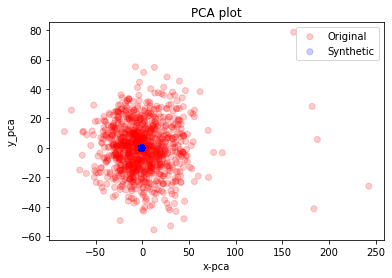

In [ ]:
random_test = random_generator(no, dim, extract_time(data)[0], extract_time(data)[1])
test_sample = Generator(torch.tensor(random_generator(no, dim, extract_time(data)[0], extract_time(data)[1])).float())[0]
test_sample = torch.reshape(test_sample, (no, seq_len, parameters['hidden_dim']))
test_recovery = Recovery(test_sample)
test_recovery = torch.reshape(test_recovery[0], (no, seq_len, dim))
visualization(data, test_recovery.detach().numpy(), 'tsne')
visualization(data, test_recovery.detach().numpy(), 'pca')
  